In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

# Load the dataset
df = pd.read_csv('/Users/aplle/Desktop/Applied Data Science/Time Series Analysis/PYQs_2013-2023.csv')

df

,Year,Subject,Question,Answer,Explanation
0,UPSC Prelims 2013,Geography,"During a thunderstorm, the thunder in the skie...",D,Thunder is produced by rapid upward movement o...
1,UPSC Prelims 2013,History,Quit India Movement was launched in response t...,B,The Quit India Movement was launched in respon...
2,UPSC Prelims 2013,Science and Technology,Consider the following organisms \n1. Agaricus...,B,Agaricus is not used as a biofertilizer. It is...
3,UPSC Prelims 2013,Environment and Ecology,Consider the following fauna of India:\n1.Ghar...,C,All three are endangered in India.
4,UPSC Prelims 2013,History,With reference to the history of Indian rock-c...,C,"The caves at Badami, located in Karnataka, are..."
...,...,...,...,...,...
1095,UPSC Prelims 2023,Environment and Ecology,Which one of the following is the best example...,D,"The Rann of Kutch, located in the state of Guj..."
1096,UPSC Prelims 2023,History,Consider the following statements\n\nStatement...,A,7th August is indeed celebrated as National Ha...
1097,UPSC Prelims 2023,Polity,Consider the following statements inrespect of...,C,Statement-I is correct. The Constitution Day i...
1098,UPSC Prelims 2023,International Relation,Consider the following countries\n \n1. Bulgar...,A,The countries neighboring Ukraine are: Belarus...


#### Data Cleaning and Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         1100 non-null   object
 1   Subject      1100 non-null   object
 2   Question     1100 non-null   object
 3   Answer       1100 non-null   object
 4   Explanation  1100 non-null   object
dtypes: object(5)
memory usage: 43.1+ KB


In [3]:
# Checking to see the 'Question' of the first data point
df['Question'][0]

'During a thunderstorm, the thunder in the skies is produced by the\n\n1. meeting of cumulonimbus clouds in the sky\n2. lightning that separates the nimbus clouds\n3. violent upward movement of air and water particles\n\nSelect the correct answer using the codes given below.\n(a) 1 only\n(b) 2 and 3\n(C) 1 and 3\n(d) None of the above produces the thunder'

In [4]:
# Checking to see the 'Explanation' of the first data point
df['Explanation'][0]

'Thunder is produced by rapid upward movement of warm and mosit air.'

In [5]:
# Structure the data. First strip text of leading or trailing white spaces and reduce to lower case 
df['Subject'] = df['Subject'].str.strip().str.lower()
df['Question'] = df['Question'].str.strip().str.lower()
df['Answer'] = df['Answer'].str.strip().str.lower()
df['Explanation'] = df['Explanation'].str.strip().str.lower()

In [6]:
# Correct Data Types 
# 'Year' should be an integer
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)  # using regular expression


In [7]:
# Remove newline characters from 'Question' and 'Explanation'
df['Question'] = df['Question'].str.replace('\n', ' ', regex=False)
df['Explanation'] = df['Explanation'].str.replace('\n', ' ', regex=False)

In [8]:
# Check for unique subjects to ensure consistency
print("Unique subjects:\n", df['Subject'].unique())

Unique subjects:
 ['geography' 'history' 'science and technology' 'environment and ecology'
 'economy' 'polity' 'ec' 'culture' 'international relations'
 'government schemes' 'government organisations' 'awards and prizes'
 'government scheme' 'organisations' 'sports' 'current affairs'
 'environment' 'economy & govt. schemes' 'international relation'
 'schemes']


In [9]:
# Replace substrings to standardize subjects
df['Subject'] = df['Subject'].replace({
    'science and technology': 'science & technology',
    'environment and ecology': 'environment & ecology',
    'govt. schemes': 'government schemes',
    'government scheme':'government schemes',
    'govt. organisations':'government organisations',
    'organisations': 'government organisations',
    'international relations': 'international relations',
    'international relation': 'international relations',
    'economy & govt. schemes': 'economy',
    'environment': 'environment & ecology',
    'ec': 'environment & ecology',
    'schemes': 'government schemes'
})

In [10]:
# Confirming consistency
print("Unique subjects:\n", df['Subject'].unique())

Unique subjects:
 ['geography' 'history' 'science & technology' 'environment & ecology'
 'economy' 'polity' 'culture' 'international relations'
 'government schemes' 'government organisations' 'awards and prizes'
 'sports' 'current affairs']


In [11]:
# Checking for missing data
df.isnull().sum()

Year           0
Subject        0
Question       0
Answer         0
Explanation    0
dtype: int64

In [12]:
# Checking for duplicate data
df.duplicated().sum()

0

In [13]:
# Display cleaned and structured dataframe
df



,Year,Subject,Question,Answer,Explanation
0,2013,geography,"during a thunderstorm, the thunder in the skie...",d,thunder is produced by rapid upward movement o...
1,2013,history,quit india movement was launched in response t...,b,the quit india movement was launched in respon...
2,2013,science & technology,consider the following organisms 1. agaricus ...,b,agaricus is not used as a biofertilizer. it is...
3,2013,environment & ecology,consider the following fauna of india: 1.ghari...,c,all three are endangered in india.
4,2013,history,with reference to the history of indian rock-c...,c,"the caves at badami, located in karnataka, are..."
...,...,...,...,...,...
1095,2023,environment & ecology,which one of the following is the best example...,d,"the rann of kutch, located in the state of guj..."
1096,2023,history,consider the following statements statement-i...,a,7th august is indeed celebrated as national ha...
1097,2023,polity,consider the following statements inrespect of...,c,statement-i is correct. the constitution day i...
1098,2023,international relations,consider the following countries 1. bulgaria...,a,the countries neighboring ukraine are: belarus...


In [14]:
# Categorise questions based on topics and subjects
# Combine 'Year' and 'Subject' columns to represent the topic
df['Topic'] = df['Year'].astype(str) + '_' + df['Subject']

# Categorize the questions based on topics and subjects
question_categories = df.groupby('Topic')['Question'].apply(list).to_dict()

# Print the categories
for topic, questions in question_categories.items():
    print(f"Topic: {topic}")
    for i, question in enumerate(questions, start=1):
        print(f"Question {i}: {question}")
    print()


Topic: 2013_economy
Question 1: a rise in general level of prices may be caused by  1. an increase in the money supply 2. a decrease in the aggregate level of output 3. an increase in the effective demand  select the correct answer using the codes given below. (a) 1 only (b) 1 and 2 only (c) 2 and 3 only (d) 1, 2 and 3
Question 2: which of the following constitute capital account?  1. foreign loans 2. foreign direct investment 3. private remittances 4. portfolio investment  select the correct answer using the codes given below. (a) 1, 2 and 3 (b) 1, 2 and 4 (c) 2, 3 and 4 (d) 1, 3 and 4
Question 3: disguised unemployment generally means   (a) large number of people remain unemployed (b) alternative employment is not available (c) marginal productivity of labour is zero (d) productivity of workers is low
Question 4: consider the following liquid assets:  1.demand deposits with the banks 2.time deposits with the banks 3.savings deposits with the banks 4.currency  the correct sequence of 

#### Trend Analysis

In [15]:
df

,Year,Subject,Question,Answer,Explanation,Topic
0,2013,geography,"during a thunderstorm, the thunder in the skie...",d,thunder is produced by rapid upward movement o...,2013_geography
1,2013,history,quit india movement was launched in response t...,b,the quit india movement was launched in respon...,2013_history
2,2013,science & technology,consider the following organisms 1. agaricus ...,b,agaricus is not used as a biofertilizer. it is...,2013_science & technology
3,2013,environment & ecology,consider the following fauna of india: 1.ghari...,c,all three are endangered in india.,2013_environment & ecology
4,2013,history,with reference to the history of indian rock-c...,c,"the caves at badami, located in karnataka, are...",2013_history
...,...,...,...,...,...,...
1095,2023,environment & ecology,which one of the following is the best example...,d,"the rann of kutch, located in the state of guj...",2023_environment & ecology
1096,2023,history,consider the following statements statement-i...,a,7th august is indeed celebrated as national ha...,2023_history
1097,2023,polity,consider the following statements inrespect of...,c,statement-i is correct. the constitution day i...,2023_polity
1098,2023,international relations,consider the following countries 1. bulgaria...,a,the countries neighboring ukraine are: belarus...,2023_international relations


In [16]:
# Distribution of questions per subject
subject_distribution = df['Subject'].value_counts()
print(subject_distribution)

# Count the number of questions for each subject per year
subject_counts = df.groupby(['Year', 'Subject']).size().unstack(fill_value=0)

print("\n Number of questions per subject per year:")
(subject_counts)


economy                     185
history                     176
environment & ecology       168
polity                      165
science & technology        139
geography                   125
international relations      85
government schemes           28
culture                      14
government organisations      8
sports                        5
awards and prizes             1
current affairs               1
Name: Subject, dtype: int64

 Number of questions per subject per year:


Subject,awards and prizes,culture,current affairs,economy,environment & ecology,geography,government organisations,government schemes,history,international relations,polity,science & technology,sports
Year,,,,,,,,,,,,,
2013,0,0,0,17,17,16,0,0,16,0,17,17,0
2014,0,8,0,10,18,16,0,3,13,6,12,14,0
2015,1,1,0,16,10,15,2,1,14,13,15,12,0
2016,0,0,0,19,13,5,0,10,18,19,5,11,0
2017,0,2,0,11,12,8,2,10,12,10,23,10,0
2018,0,3,0,20,12,9,2,2,18,10,13,11,0
2019,0,0,0,19,15,10,2,0,17,6,16,15,0
2020,0,0,0,21,14,12,0,0,19,2,18,14,0
2021,0,0,1,15,21,7,0,0,20,0,20,13,3


In [17]:
topic_df= pd.DataFrame(df['Topic'].value_counts())
topic_df

,Topic
2017_polity,23
2022_environment & ecology,21
2020_economy,21
2021_environment & ecology,21
2022_economy,21
...,...
2018_government organisations,2
2015_awards and prizes,1
2021_current affairs,1
2015_culture,1


In [18]:
# Number of questions per year
questions_per_year = df['Year'].value_counts()
print(questions_per_year)

2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
2023    100
Name: Year, dtype: int64


#### Visualizations

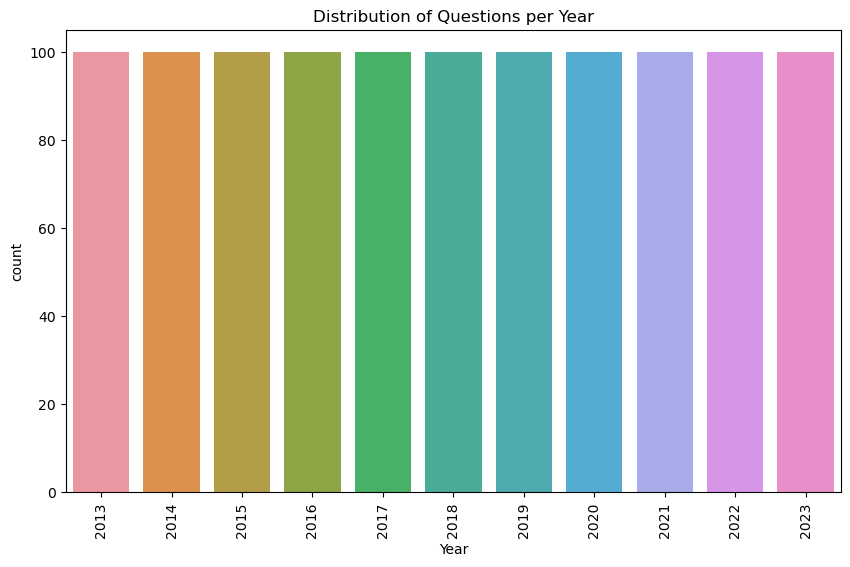

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of questions per year and per subject
yearly_distribution = df.groupby('Year').size()
subject_distribution = df.groupby('Subject').size()

# Plot the distribution of questions per year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Questions per Year')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Distribution of Questions per Year.pdf',dpi=100,)


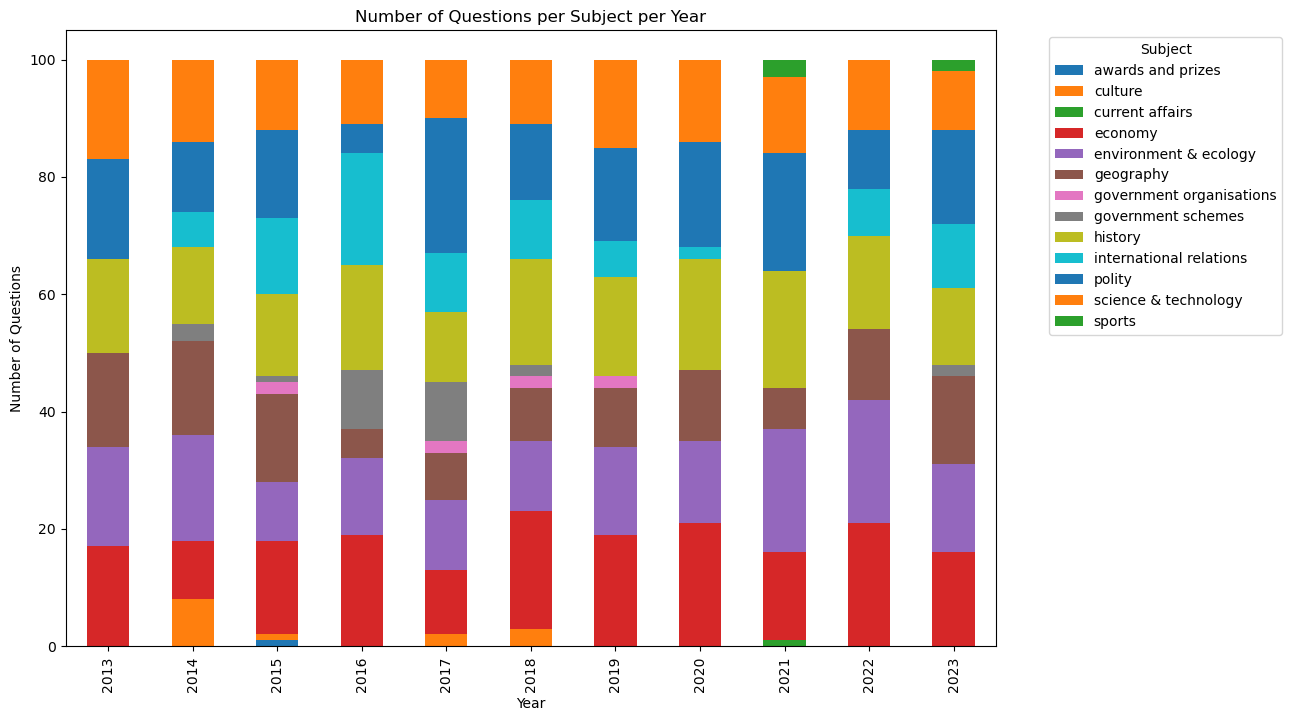

In [20]:
#Plot the number of questions per subject per year
subject_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Questions per Subject per Year')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

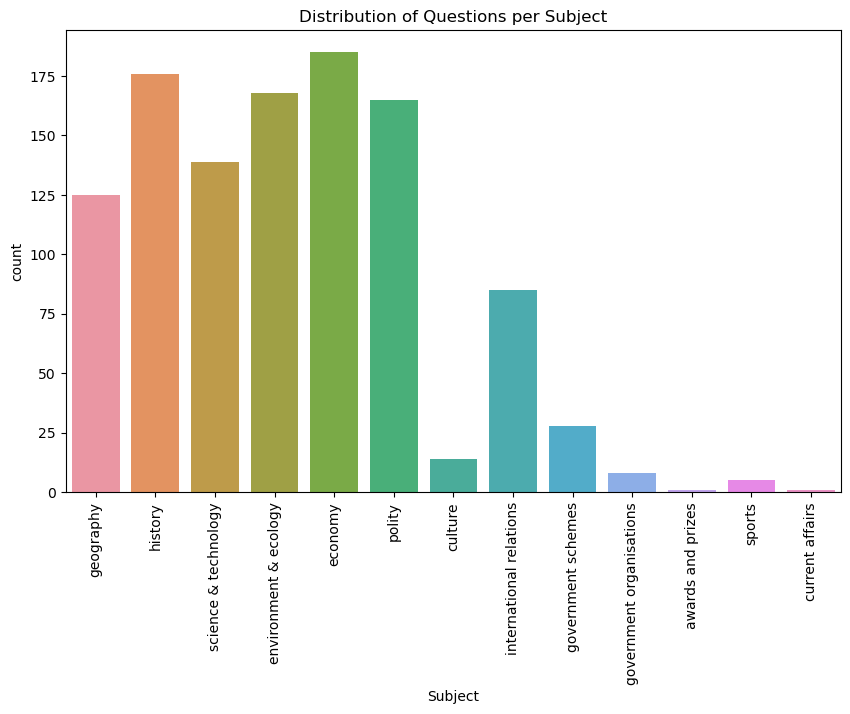

In [21]:
# Plot the distribution of questions per subject
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject', data=df)
plt.title('Distribution of Questions per Subject')
plt.xticks(rotation=90)
plt.show()

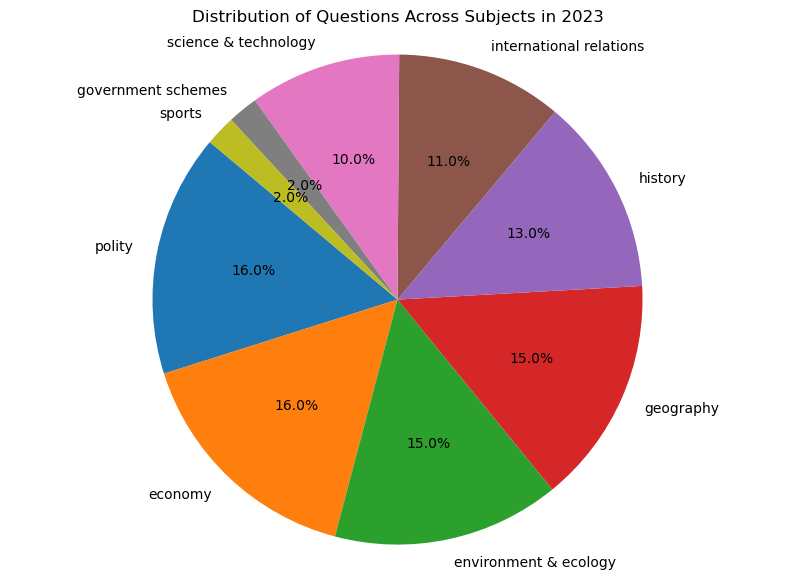

In [22]:
# Create function to plot pie chart
def plot_pie_chart_for_year(df, year):
    # Filter data for the given year
    year_data = df[df['Year'] == year]
    
    # Aggregate data by subject
    subject_counts = year_data['Subject'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(10, 7))
    plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
    plt.title(f'Distribution of Questions Across Subjects in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot pie chart for the year 2023
plot_pie_chart_for_year(df, 2023)

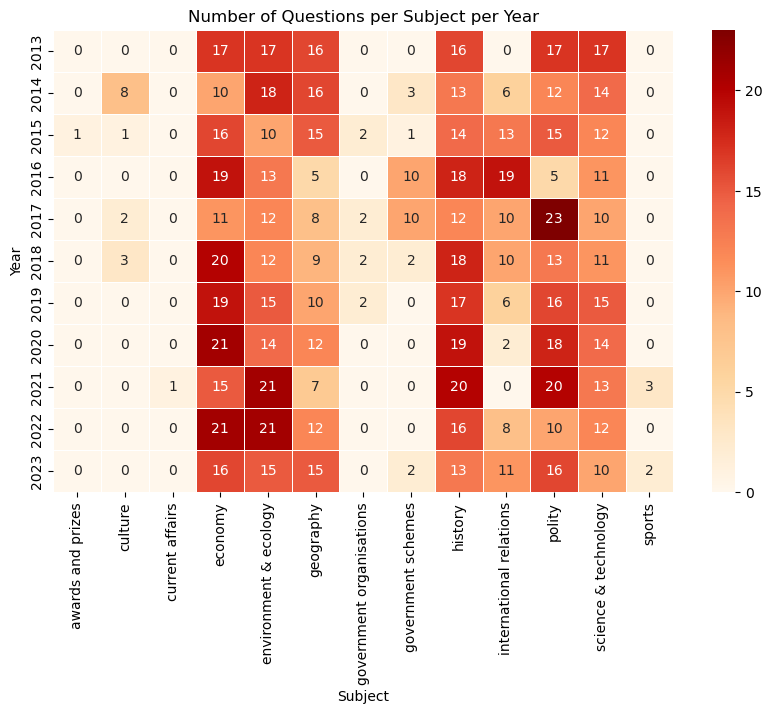

In [23]:
# Plot the data using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subject_counts, annot=True, fmt='d', cmap='OrRd', linewidths=.5)
plt.title('Number of Questions per Subject per Year')
plt.ylabel('Year')
plt.xlabel('Subject')
plt.show()

#### Building the Model 

In [24]:
df

,Year,Subject,Question,Answer,Explanation,Topic
0,2013,geography,"during a thunderstorm, the thunder in the skie...",d,thunder is produced by rapid upward movement o...,2013_geography
1,2013,history,quit india movement was launched in response t...,b,the quit india movement was launched in respon...,2013_history
2,2013,science & technology,consider the following organisms 1. agaricus ...,b,agaricus is not used as a biofertilizer. it is...,2013_science & technology
3,2013,environment & ecology,consider the following fauna of india: 1.ghari...,c,all three are endangered in india.,2013_environment & ecology
4,2013,history,with reference to the history of indian rock-c...,c,"the caves at badami, located in karnataka, are...",2013_history
...,...,...,...,...,...,...
1095,2023,environment & ecology,which one of the following is the best example...,d,"the rann of kutch, located in the state of guj...",2023_environment & ecology
1096,2023,history,consider the following statements statement-i...,a,7th august is indeed celebrated as national ha...,2023_history
1097,2023,polity,consider the following statements inrespect of...,c,statement-i is correct. the constitution day i...,2023_polity
1098,2023,international relations,consider the following countries 1. bulgaria...,a,the countries neighboring ukraine are: belarus...,2023_international relations


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['Question']).toarray()
y = df['Subject']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# Model development using RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
# Evaluate the model
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 culture       0.00      0.00      0.00         2
         current affairs       0.00      0.00      0.00         1
                 economy       0.78      0.63      0.70        46
   environment & ecology       0.45      0.46      0.45        46
               geography       0.32      0.31      0.31        26
government organisations       0.00      0.00      0.00         2
      government schemes       1.00      0.25      0.40         4
                 history       0.66      0.83      0.74        47
 international relations       0.47      0.44      0.46        18
                  polity       0.70      0.89      0.78        36
    science & technology       0.60      0.55      0.58        47

                accuracy                           0.60       275
               macro avg       0.45      0.40      0.40       275
            weighted avg       0.59      0.60      0.58       275



/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Forecasting for 2024
# Using the average question distribution from the past as the baseline

average_distribution = subject_counts.mean(axis=0)

# Normalize the distribution to get probabilities
probabilities = average_distribution / average_distribution.sum()
probabilities


Subject
awards and prizes           0.000909
culture                     0.012727
current affairs             0.000909
economy                     0.168182
environment & ecology       0.152727
geography                   0.113636
government organisations    0.007273
government schemes          0.025455
history                     0.160000
international relations     0.077273
polity                      0.150000
science & technology        0.126364
sports                      0.004545
dtype: float64

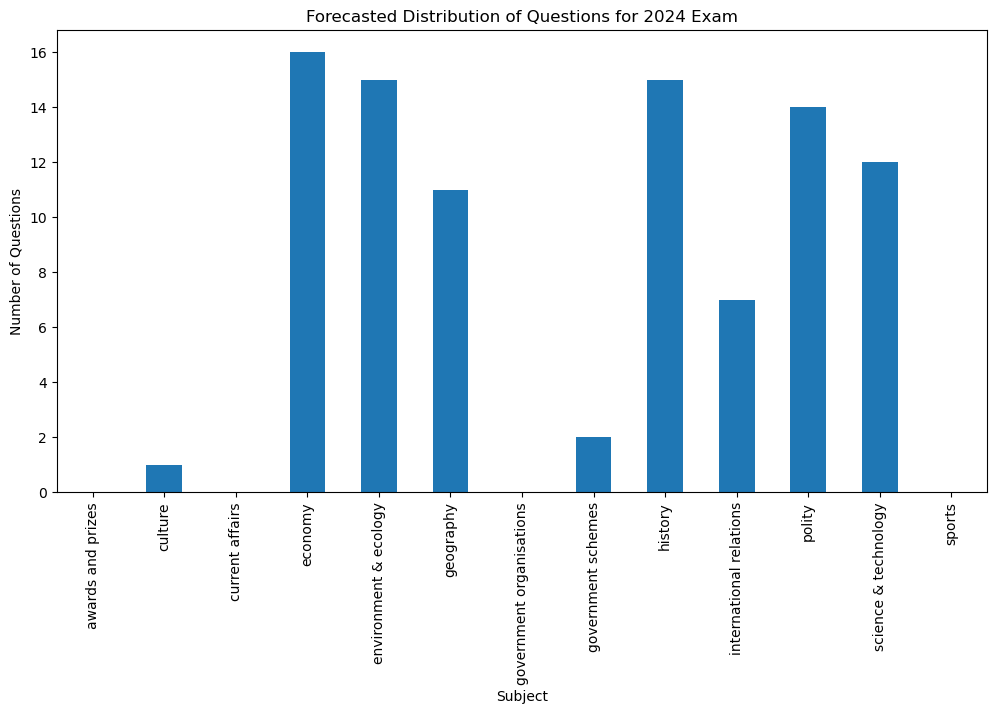

In [30]:
# Forecast the number of questions for each subject in 2024
total_questions_2024 = 100  # Assuming there will be 100 questions in 2024 exam
forecast_2024 = (probabilities * total_questions_2024).astype(int)


# Plot the forecasted distribution for 2024
forecast_2024.plot(kind='bar', figsize=(12, 6))
plt.title('Forecasted Distribution of Questions for 2024 Exam')
plt.xlabel('Subject')
plt.ylabel('Number of Questions')
plt.show()


In [31]:
# Print forecasted distribution
print(forecast_2024)


Subject
awards and prizes            0
culture                      1
current affairs              0
economy                     16
environment & ecology       15
geography                   11
government organisations     0
government schemes           2
history                     15
international relations      7
polity                      14
science & technology        12
sports                       0
dtype: int64


In [32]:
# Model development using RandomForestClassifier
model_NB =  MultinomialNB()
model_NB.fit(X_train, y_train)

MultinomialNB()

In [33]:
# Evaluate the model
y_pred = model_NB.predict(X_test)
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 culture       0.00      0.00      0.00         2
         current affairs       0.00      0.00      0.00         1
                 economy       0.78      0.83      0.80        46
   environment & ecology       0.55      0.78      0.64        46
               geography       0.47      0.35      0.40        26
government organisations       0.00      0.00      0.00         2
      government schemes       0.00      0.00      0.00         4
                 history       0.74      0.89      0.81        47
 international relations       0.80      0.22      0.35        18
                  polity       0.77      0.94      0.85        36
    science & technology       0.89      0.66      0.76        47

                accuracy                           0.71       275
               macro avg       0.45      0.42      0.42       275
            weighted avg       0.70      0.71      0.68       275



/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aplle/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Forecasting for 2024
# Using the average question distribution from the past as the baseline

average_distribution = subject_counts.mean(axis=0)

# Normalize the distribution to get probabilities
probabilities = average_distribution / average_distribution.sum()
probabilities


Subject
awards and prizes           0.000909
culture                     0.012727
current affairs             0.000909
economy                     0.168182
environment & ecology       0.152727
geography                   0.113636
government organisations    0.007273
government schemes          0.025455
history                     0.160000
international relations     0.077273
polity                      0.150000
science & technology        0.126364
sports                      0.004545
dtype: float64

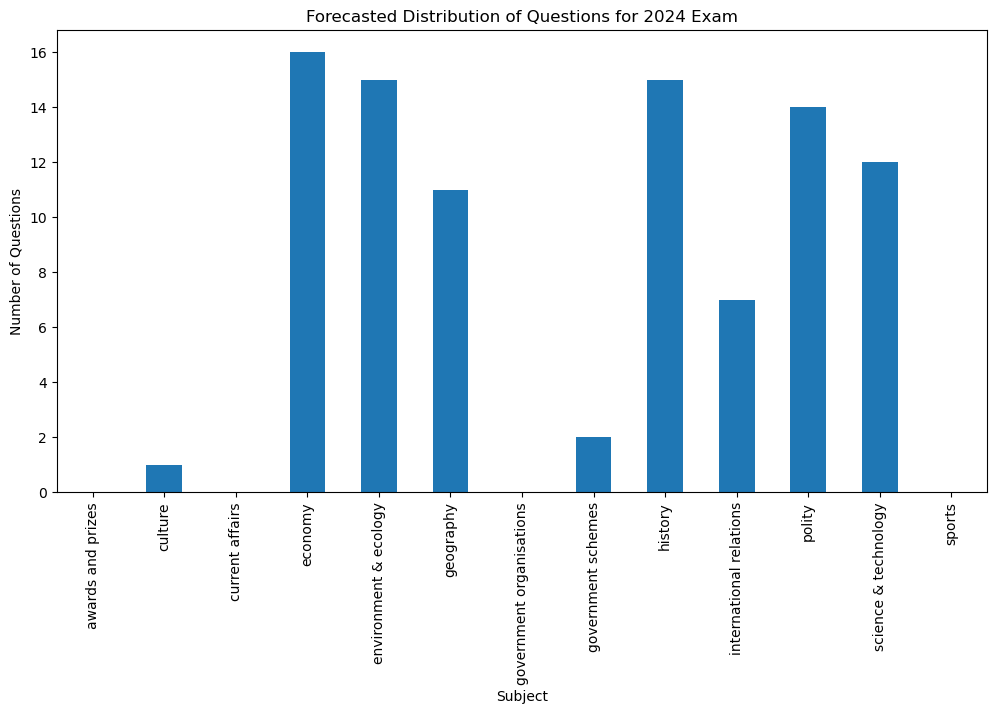

In [35]:
# Forecast the number of questions for each subject in 2024
total_questions_2024 = 100  # Assuming there will be 100 questions in 2024 exam
forecast_2024 = (probabilities * total_questions_2024).astype(int)


# Plot the forecasted distribution for 2024
forecast_2024.plot(kind='bar', figsize=(12, 6))
plt.title('Forecasted Distribution of Questions for 2024 Exam')
plt.xlabel('Subject')
plt.ylabel('Number of Questions')
plt.show()


In [36]:
# Print forecasted distribution
print(forecast_2024)

Subject
awards and prizes            0
culture                      1
current affairs              0
economy                     16
environment & ecology       15
geography                   11
government organisations     0
government schemes           2
history                     15
international relations      7
polity                      14
science & technology        12
sports                       0
dtype: int64


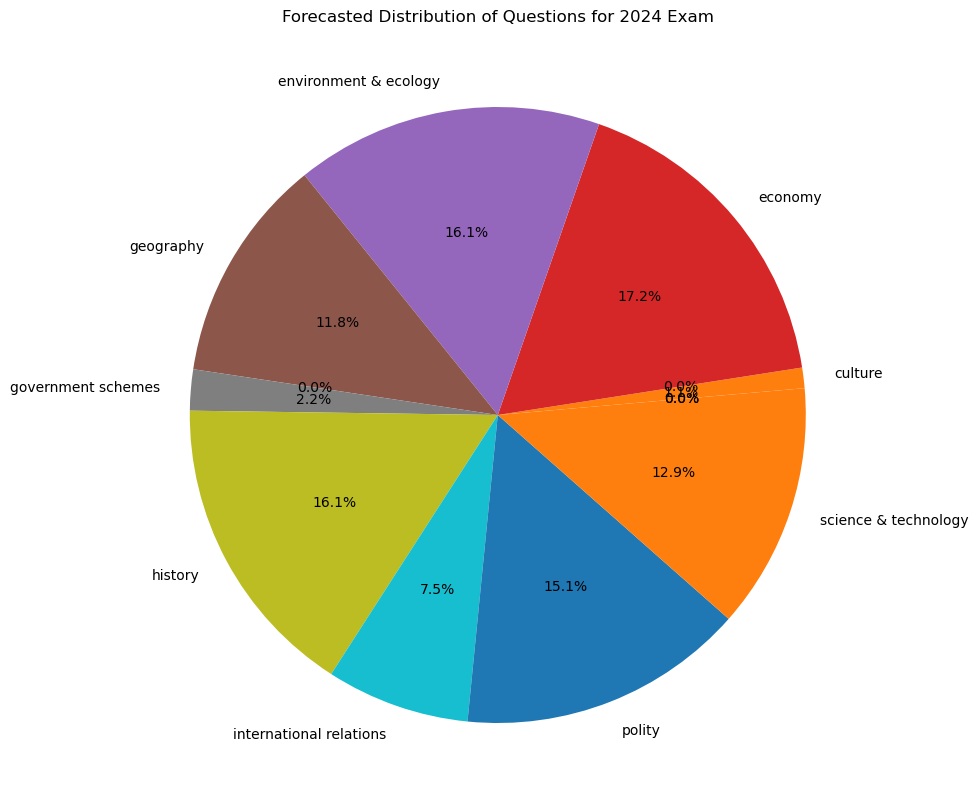

In [37]:
# Plot the forecasted distribution for 2024 as a pie chart
plt.figure(figsize=(14, 10))
forecast_2024.plot(kind='pie', autopct='%1.1f%%', startangle=5)
plt.title('Forecasted Distribution of Questions for 2024 Exam')
# plt.ylabel('')  # Hide the y-label
plt.show()

In [38]:
# Using statistical means to justify predictions
print("Mean distribution of questions per subject:\n", average_distribution)
print("Standard deviation of distribution per subject:\n", subject_counts.std(axis=0))

Mean distribution of questions per subject:
 Subject
awards and prizes            0.090909
culture                      1.272727
current affairs              0.090909
economy                     16.818182
environment & ecology       15.272727
geography                   11.363636
government organisations     0.727273
government schemes           2.545455
history                     16.000000
international relations      7.727273
polity                      15.000000
science & technology        12.636364
sports                       0.454545
dtype: float64
Standard deviation of distribution per subject:
 Subject
awards and prizes           0.301511
culture                     2.453198
current affairs             0.301511
economy                     3.736795
environment & ecology       3.635682
geography                   3.854160
government organisations    1.009050
government schemes          3.830500
history                     2.683282
international relations     5.780846
polity     

Mean and Standard Deviation:

The mean represents the average number of questions per subject over the years.
The standard deviation indicates the variability or spread of the number of questions per subject.

Subjects with low standard deviation (e.g., Awards and Prizes, Current Affairs) have more consistent question counts.
Subjects with higher standard deviation (e.g., International Relations, Polity) exhibit more variability


In [39]:
# Compare forecast with historical average
historical_avg = average_distribution.copy()

comparison = pd.concat([forecast_2024, historical_avg], axis=1)
comparison.columns = ['Forecast 2024', 'Historical Average']

print("Comparison of Forecasted and Historical Average Distribution:\n", comparison)

Comparison of Forecasted and Historical Average Distribution:
                           Forecast 2024  Historical Average
Subject                                                    
awards and prizes                     0            0.090909
culture                               1            1.272727
current affairs                       0            0.090909
economy                              16           16.818182
environment & ecology                15           15.272727
geography                            11           11.363636
government organisations              0            0.727273
government schemes                    2            2.545455
history                              15           16.000000
international relations               7            7.727273
polity                               14           15.000000
science & technology                 12           12.636364
sports                                0            0.454545


#### Conclusion: 
As can be seen in the final comparison between the 2024 Forecast and the Historical average (which is an aggregated average of distribution of questions over the last ten years), historical trends do align with our predictions. Conclusively, both models- The RandomForest Classifier and the Naive Bayes model, at 60% and 71% accuracy respectively performed well. Further trials with other models did not do as well.